## Import functions and define universal values

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0,'./code')
import eigencurves_prefit

#May need to add things

lcName='W18_NIRISS_spec_lambin_25_prefit_all'
planetparams={}
planetparams['t0']=2459802.4078798565 #units of days
planetparams['per']=0.941452382 #units of days
planetparams['a_abs']=0.0218 #units of AU
planetparams['inc']=84.35320 #units of degrees
planetparams['ecc']=0.0 #unitless
planetparams['w']=269. #units of degrees
planetparams['rprs']=0.09783 #unitless ratio
planetparams['ars']=3.48023 #unitless ratio
planetparams['t_sec']=2459802.8786060475 #units of days


## Load in data and set up data dictionary

[-151.80721751  134.72413971]
(5,)
(5, 2719)


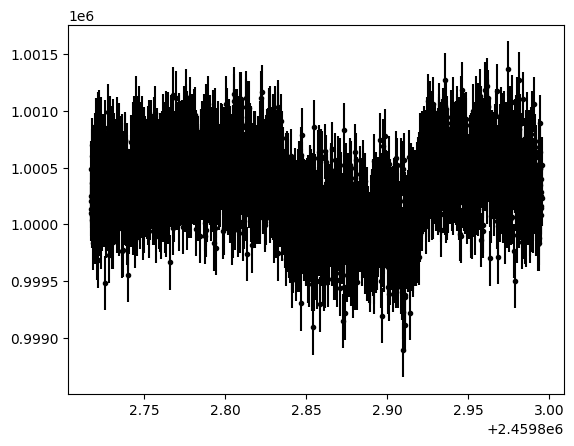

In [5]:
# waveind=16 #for fitting a single wavelength
homedir='/Users/megan/Documents/Projects/JWST_ERS/EclipseMap/'
# specfile=np.load(homedir+'/real_spec/bin25/ind_bins_'+str(waveind)+'.npz')
specfile=np.load(homedir+'/real_spec/bin25/spec_lambin_25.npz')
time=specfile['arr_0']
waves=specfile['arr_1']
# waves=np.array([specfile['arr_1']])
fluxes=specfile['arr_3']+10**6.
errs=specfile['arr_4']
extent=np.zeros(2)
extent[0]=(np.min(time)-planetparams['t_sec'])/planetparams['per']*2.*np.pi-np.pi/2. #minimum observed point, in radians
extent[1]=(np.max(time)-planetparams['t_sec'])/planetparams['per']*2.*np.pi+np.pi/2. #maximum observed point, in radians
print(extent*180./np.pi)
print(np.shape(waves))
print(np.shape(errs))

plt.figure()
plt.errorbar(time,fluxes[0,:],yerr=errs[0,:],color='k',marker='.',linestyle='none')
plt.show()

datadict={"time (days)":time, "wavelength (um)":waves, "flux (ppm)": fluxes, "flux err (ppm)": errs}


## Perform eigencurve fitting at each wavelength

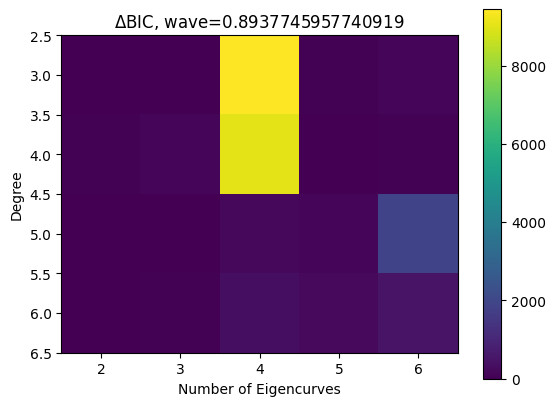

In [ ]:
ordmin=3
ordmax=6
eigenmin=2
eigenmax=6
BICdict=eigencurves_prefit.eigencurves(datadict,planetparams,homedir,ordmin,ordmax,eigenmin,eigenmax,\
                            lcName=lcName,plot=False,strict=False,nonegs=True,verbose=False)
